In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_pred = os.path.join(pth_data, 'modeling', 'predict')
pth_out = os.path.join(pth, 'figures', 'cancer', 'CCCA')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_pred, 'CCCA_malignant.h5ad'))
adata

AnnData object with n_obs × n_vars = 1434229 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores', 'post_op_gleason_score', 'margin

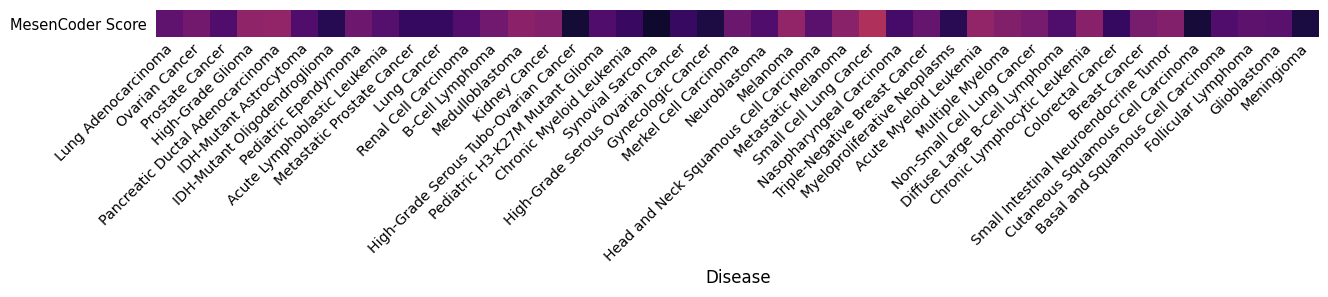

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
order = pd.read_csv('disease_order.csv', header = 0, index_col = 0).index
z = adata.obs.groupby('Disease', observed = True).latent_z.mean().loc[order]
ax.imshow(z.values.reshape(1, -1), cmap = 'inferno', vmin = 0, vmax = 1)
ax.set_yticks([0], ['MesenCoder Score'])
ax.set_xlabel('Disease', size = 12)
ax.tick_params(size = 0, pad = 7, labelsize = 10.5)
ax.set_xticks(np.arange(z.size), order,
              size = 10.25, rotation = 45,
              rotation_mode = 'anchor',
              ha = 'right', va = 'center')

for spine in ax.spines.values():
    spine.set_visible(False)

fn = os.path.join(pth_out, 'scores.pdf')
plt.savefig(fn, bbox_inches = 'tight')